# Financial Transaction Fraud Detection
+ A supervised Machine Learning `binary classification` into $2$ classes: fraude and normal transactions.
+ The target variable $y$ is categorical : `$y=1$` if fraudulent transaction and `$y=0$` if normal transaction.
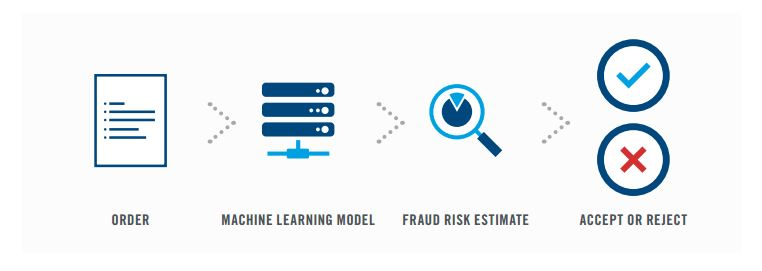

In [5]:
# Import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## Data Retrieval

In [7]:
# Data Retrieval : loading the dataset creditcard.csv into a dataframe 
data = pd.read_csv("creditcard.csv") 

## Exploratory Data Analysis (EDA)

In [8]:
# showing (number of transactions, number of variables)
print('creditcard dataset:', data.shape)

# showing the 5 first rows of the dataframe
data.head()


creditcard dataset: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


0    99.827251
1     0.172749
Name: Class, dtype: float64


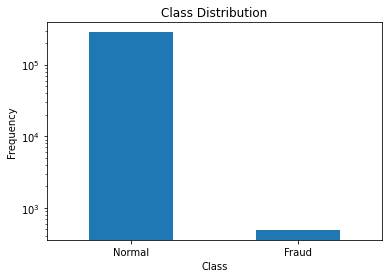

In [9]:
# Verifying the partition of classes 0 and 1 
#il faut voir avant tout si le pb de classification c équilibré ou non: pourcentage de chaque classe
LABELS = ["Normal", "Fraud"]

# Number of transactions in each class
number_of_classes = pd.value_counts(data['Class'], sort = True)

# Percentage of each class
percent_class = 100*number_of_classes/data.shape[0]
print(percent_class)

# Showing the distribution of each class using a log-scale 
number_of_classes.plot(kind = 'bar',rot=0)
plt.title("Class Distribution")
plt.xticks(range(len(number_of_classes)), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");
plt.yscale('log')

##### Q1- What's the conclusion ?
#le pourcentage de transaction normales est bcp plus grand que les fraud transactions: classification déséquilibrée
##### Q2- What should we do in data preparation ?
#on doit faire un équilibrage SUR LE TRAININg SET, ON TOUCHE PAS AU TEST SET

In [10]:
# Checking if there are missing values using .isna().any().any()
print(" Missing values ?",data.isna().any().any())

# Showing information about the dataset
data.info() 

 Missing values ? False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null 

+ All features are numerical (float64) and missing values don't exist.
+ 'Class' is categorical (int64) { 0:normal, 1:fraud }
+ il faut vérifier le scaling, la distribution et la corrélation

<AxesSubplot:>

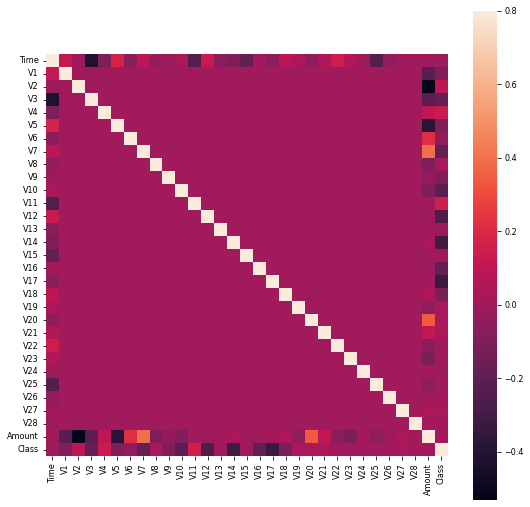

In [11]:
# Exploring the correlation between variables 
plt.figure(num=None, figsize=(9, 9)), plt.rc('font', size=8)    
sns.heatmap(data.corr(),vmax=0.8, square=True)

#### Q3- What's the conclusion ?
#les feature de V1 à V28 sont pas corrélés valeur proche de 0,1

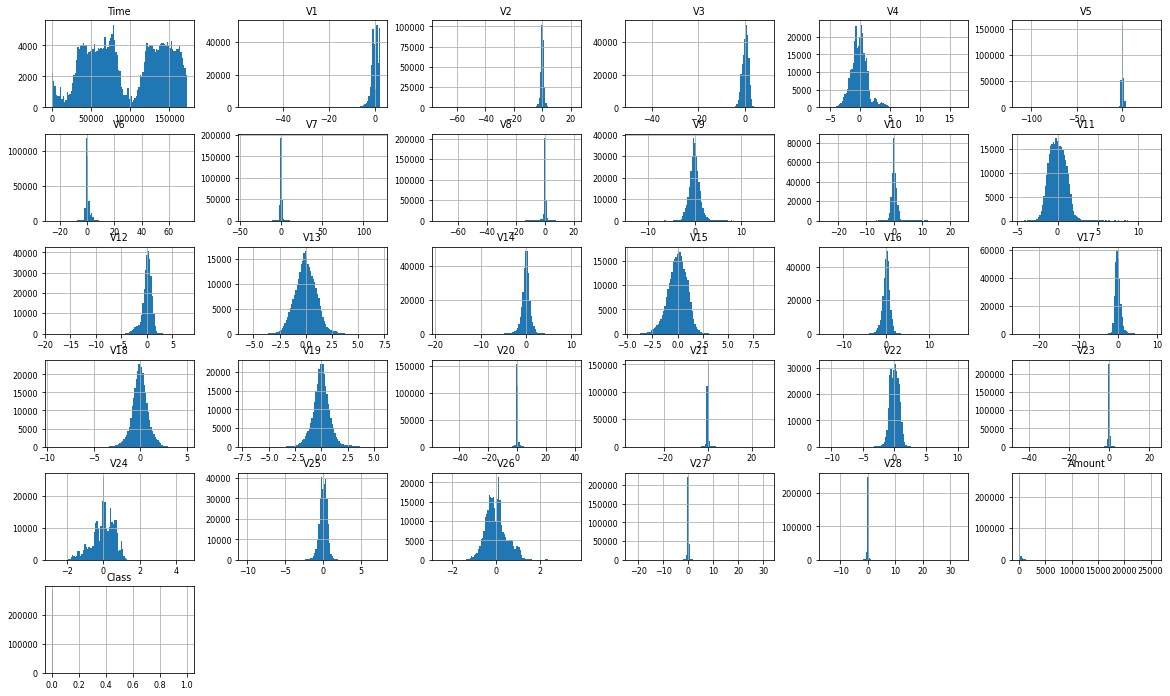

In [12]:
# Showing the distributions of variables
data.hist(bins=100, figsize=(20,12))
plt.show()

##### Q4- What's the conclusion ?
#en calcul je calcule skewness et 
#en affichage on fait .hist
#de V1 à V28 les valeur ont 0 comme moyenne, et de forme guassienne symétrique et ecartype 1 ,,, 
#on a deja appliqué 2 transformations pour rendre les features non corrélé, scaling standardisé, distribution symétrique ..
#pas de travail de prép. les features sont tous anonymes, c pas les vrais features mais c les features transformés. 
##### Q5- What should we do in data preparation ?
#we drop time because irrélevant for fraud problems and transform amount (scaling)

## Data Preparation

+ Separate target variable and features.
+ Drop the feature 'Time'.
+ Split the data into $80\%$ Training and $20\%$ Testing datasets.
+ Transform the distribution of 'Amount' with PowerTransformer & apply feature scaling with standardization.
+ Balance the training dataset by augmenting the minority class (fraud). 

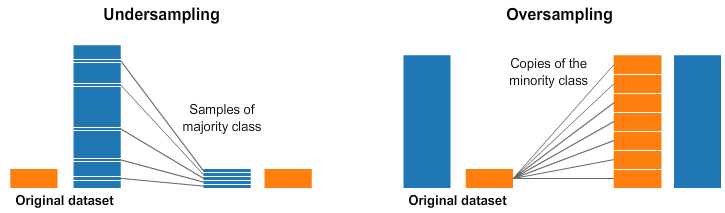

In [13]:
# Extracting 'Class' from data
y = data['Class']

# data consists only of features
data.drop(['Class','Time'], axis=1, inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [14]:
from sklearn.model_selection import train_test_split

# adding cst=1e-10 to data['Amount'] to apply PowerTransformer with 'cox-box' to get symmetric distribution 
# j'utilise la standardization car plus robuste face aux bruits
data['Amount'] = data['Amount'] + 1e-10    

# Splitting the dataset into 80% training dataset and 20% testing dataset using """"stratify""""
#strat=y oblige à garder le meme pourcentage des échantillons normal abnormal dans le test et le train set
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, random_state = 32, stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

In [15]:
# PowerTransformer of feature 'Amount' 
from sklearn.preprocessing import PowerTransformer

# Computing Skewness of 'Amount' before transformation
print('Skewness of Amount:',data['Amount'].skew())

# training the transformer of data['Amount'] on X_train['Amount'] #2 transformation à la fois stranderdize(moyenne nulle et ecartype 1) et power transfor en boox-cox pour la distribution sym
tr_scaler = PowerTransformer(method='box-cox', standardize=True, copy=False).fit(X_train['Amount'].values.reshape(-1,1))

# Applying transformation
tr_scaler.transform(X_train['Amount'].values.reshape(-1,1)) # for training #on fait trans sur test set aussi
tr_scaler.transform(X_test['Amount'].values.reshape(-1,1)) # for testing 

# Computing Skewness of 'Amount' after transformation
print('Skewness of Amount after scaling:',X_train['Amount'].skew())

Skewness of Amount: 16.977724453761017
Skewness of Amount after scaling: 0.11698333873639256


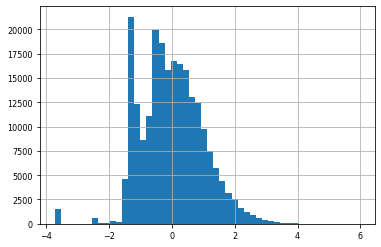

In [16]:
# Showing the distribution of 'Amount' after transformation
X_train['Amount'].hist(bins=50, figsize=(6,4))
plt.show()

# Balancing the training dataset

+ Augmenting the `minority` class: oversampling with `SMOTE` method:(smote se base sur le KNN)(echantillons syntétique mais realistic)
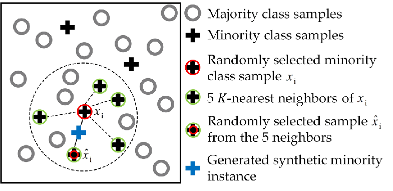

+ Reducing the `majority` class: undersampling with `TomekLink` method: 
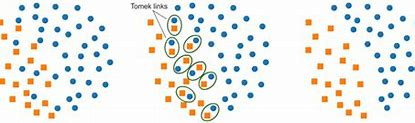
+ `SMOTETomek` combines them to balance classes and to clean boundaries (=> better separation).

In [17]:
# Augmenting the minority class with SMOTETomek to balance the two classes (only for the training dataset)
!pip install -U imbalanced-learn
from collections import Counter
from imblearn.combine import SMOTETomek 
smt = SMOTETomek(random_state=42)
X_resampled,y_resampled = smt.fit_resample(X_train.values,y_train.values.ravel()) #l'equilibrage est SEULEMENT pour le trainset not test set!!!!!!
print('training dataset %s' % Counter(y_resampled))

training dataset Counter({0: 227451, 1: 227451})


## Modeling and Evaluation

+ `LogisticRegression`: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
+ `GaussianNB`: https://scikit-learn.org/stable/modules/naive_bayes.html ce modele on l'utilise car nos features sont numérique pas catégorique comme le cours.. donc on fait gaussian naive bayes
+ `KNeighborsClassifier`: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
+ `SVC`:https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html : SVM pour les probleme de regression, SVC pour les problemes de classification

In [2]:
# Importing libraries
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import svc

# showing default hyperparameters with get_params()
#on a pas fait le fine tuning (exemple le tuning cross validation et grid search pour choisir le best k avec le fit et tout)
GaussianNB().get_params() 
#svc.get_params()
#KNeighborsClassifier.get_params()
#homework: tuning de k = n_neighbors avec val possibles (3,5,7,11)

{'priors': None, 'var_smoothing': 1e-09}

In [3]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [4]:
#Homework Q1:Fine Tuning on KNN n_neighbors parameter : 
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": [3,5,7,9,11]}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_resampled, y_resampled)


NameError: name 'X_resampled' is not defined

In [24]:
#best parameter using gridsearch
print(gridsearch.best_params_)

{'n_neighbors': 3}


In [68]:
#Homework Q2:Cross validation
from sklearn.model_selection import cross_val_score
k_range=[3,5,7,9,11]
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_resampled,y_resampled,cv=10,scoring='accuracy')
    k_scores.append((k,scores.mean()))
print(k_scores)

[(3, 0.9993998709056442), (5, 0.9991294830172274), (7, 0.9988766814115102), (9, 0.9985711211509887), (11, 0.9983227158260052)]


In [33]:
# Create a list of the classification models
models = [LogisticRegression(C=1.5), GaussianNB(), KNeighborsClassifier(n_neighbors=3)]
#il faut s'assurer que n-neighbors=7 est la bonne val ou non : verdict : non! c bien 3

print(models)

# names of models
names = ['LogisticRegression', 'GaussianNB', 'KNeighborsClassifier']

[LogisticRegression(C=1.5), GaussianNB(), KNeighborsClassifier(n_neighbors=3)]


### Confusion matrix
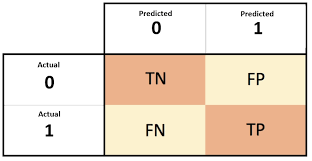

### Classification Metrics
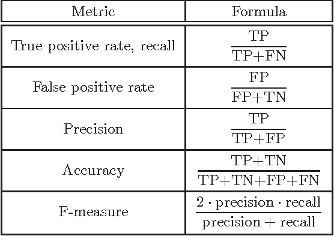

In [49]:
from sklearn.metrics import f1_score, auc, precision_recall_curve, confusion_matrix
def modeling_evaluate(model, Xtrain, ytrain, Xtest, ytest):   
    # supervised training with fit()
    model.fit(Xtrain, ytrain)
    # predict for testing dataset
    ypred = model.predict(Xtest) 
    # computing evaualtion metrics: confusion matrix and f1-score
    confusion = confusion_matrix(ytest, ypred)    
    f1 = f1_score(ytest, ypred)    
    # compute precision, recall et PR_AUC (Area Under the PR curve )
    precision, recall, thresholds = precision_recall_curve(ytest, model.predict_proba(Xtest)[:,1]) 
    pr_auc = auc(recall, precision)
    return model, confusion, f1, recall, precision, pr_auc
#on utilise ces metrics car la classification est DESEQUILIBRé MEME SI ON A EQUILIBré LE TRAIN SET, ON A PAS EQUILIBré LE TEST SET

LogisticRegression f1= 0.12149532710280375 pr_auc= 0.7729959559874364 
confusion= [[55555  1309]
 [    7    91]]
GaussianNB f1= 0.10225197808886183 pr_auc= 0.44658461442573566 
confusion= [[55403  1461]
 [   14    84]]
KNeighborsClassifier f1= 0.7172995780590716 pr_auc= 0.7822153876556334 
confusion= [[56810    54]
 [   13    85]]


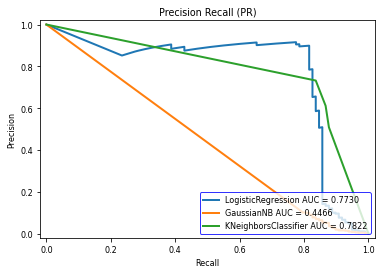

In [39]:
fig, ax = plt.subplots() 
for i in range(len(models)):
    models[i], confusion, f1, recall, precision, pr_auc = modeling_evaluate(models[i], X_resampled, y_resampled, X_test.values, y_test) 
    print(names[i], 'f1=', f1, 'pr_auc=', pr_auc, '\nconfusion=', confusion)
    plt.plot(recall, precision, label = (names[i] + ' AUC = %0.4f' % pr_auc), linewidth=2.0)
    
leg = plt.legend(loc = 'lower right'); leg.get_frame().set_edgecolor('b')
plt.title('Precision Recall (PR)')
plt.xlim([-.02, 1.02]); plt.ylim([-.02, 1.02])
plt.ylabel('Precision'); plt.xlabel('Recall')
plt.show() 

f1= 0.7172995780590716 pr_auc= 0.7822153876556334 
confusion= [[56810    54]
 [   13    85]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.82      0.88        98

    accuracy                           1.00     56962
   macro avg       0.98      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



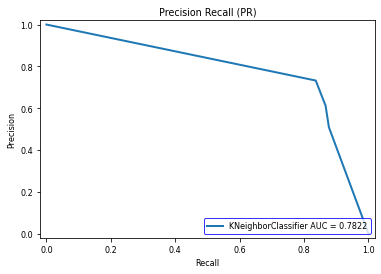

In [63]:
#best model based on f1 score result : KNeighbors
#Homework Q3:Choisir le meilleur modèle qui donne le score F1 le plus élevé
#afficher ses performances : Précision, Recall, F1-score, matrice de confusion, PR-AUC et afficher sa courbe PR.
model=KNeighborsClassifier(n_neighbors=3)
model, confusion, f1, recall, precision, pr_auc = modeling_evaluate(model, X_resampled, y_resampled, X_test.values, y_test) 
print('f1=', f1, 'pr_auc=', pr_auc, '\nconfusion=', confusion  )
print(classification_report(y_test, y_predict))
plt.plot(recall, precision, label = ('KNeighborClassifier' + ' AUC = %0.4f' % pr_auc), linewidth=2.0)
    
leg = plt.legend(loc = 'lower right'); leg.get_frame().set_edgecolor('b')
plt.title('Precision Recall (PR)')
plt.xlim([-.02, 1.02]); plt.ylim([-.02, 1.02])
plt.ylabel('Precision'); plt.xlabel('Recall')
plt.show() 